### Basic stats - 2

### a. Build 99% Confidence Interval Using Sample Standard Deviation

In [1]:
import numpy as np
from scipy import stats


In [4]:
# Data
data = [1.13, 1.55, 1.43, 0.92, 1.25, 1.36, 1.32, 0.85, 1.07, 1.48, 1.20, 1.33, 1.18, 1.22, 1.29]
print(data)

[1.13, 1.55, 1.43, 0.92, 1.25, 1.36, 1.32, 0.85, 1.07, 1.48, 1.2, 1.33, 1.18, 1.22, 1.29]


In [7]:
# Confidence Interval Using Sample Standard Deviation

# Sample mean
sample_mean = np.mean(data)
print(sample_mean)

1.2386666666666666


In [9]:
# Sample standard deviation
sample_std = np.std(data, ddof=1)
print(sample_std)

0.19316412956959936


In [10]:
# Sample size
n = len(data)
print(n)

15


In [12]:
# Degrees of freedom
df = n - 1
print(df)

14


In [13]:
# t-score for 99% confidence interval
t_score = stats.t.ppf(1 - 0.005, df)
print(t_score)

2.97684273411266


In [14]:
# Margin of error
margin_of_error_sample = t_score * (sample_std / np.sqrt(n))
print(margin_of_error_sample)

0.1484693282152996


### b.Build 99% Confidence Interval using Known Population Standard Deviation

In [16]:
# Confidence interval
ci_sample = (sample_mean - margin_of_error_sample, sample_mean + margin_of_error_sample)
print(f"99% Confidence Interval using sample standard deviation: {ci_sample}")

99% Confidence Interval using sample standard deviation: (1.090197338451367, 1.3871359948819662)


In [17]:
# b. Confidence Interval Using Known Population Standard Deviation

# Known population standard deviation
population_std = 0.2
print(population_std)

0.2


In [18]:
# z-score for 99% confidence interval
z_score = stats.norm.ppf(1 - 0.005)
print(z_score)

2.5758293035489004


In [19]:
# Margin of error
margin_of_error_population = z_score * (population_std / np.sqrt(n))
print(margin_of_error_population)

0.13301525327090588


In [20]:
# Confidence interval
ci_population = (sample_mean - margin_of_error_population, sample_mean + margin_of_error_population)

print(f"99% Confidence Interval using known population standard deviation: {ci_population}")

99% Confidence Interval using known population standard deviation: (1.1056514133957607, 1.3716819199375725)


## Basic statistics sales data with discounts

In [8]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [9]:
import pandas as pd
data = pd.read_csv(r"C:\Users\OM\Downloads\Basic stats - 2\Basic stats - 1\sales_data_with_discounts.csv")
data      

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,2,Lifestyle,Jeera,M-Casuals,1300,2600,15.475687,402.367873,2197.632127
446,15-04-2021,Thursday,L07,C,6,Lifestyle,Viva,W-Western,2600,15600,17.057027,2660.896242,12939.103758
447,15-04-2021,Thursday,L08,C,2,Lifestyle,Viva,W-Lounge,1600,3200,18.965550,606.897606,2593.102394
448,15-04-2021,Thursday,L09,C,3,Lifestyle,Jeera,M-Formals,1900,5700,16.793014,957.201826,4742.798174


In [10]:
# Display the first few rows of the data
print(data.head())

         Date       Day  SKU City  Volume       BU  Brand       Model  \
0  01-04-2021  Thursday  M01    C      15  Mobiles  RealU       RU-10   
1  01-04-2021  Thursday  M02    C      10  Mobiles  RealU   RU-9 Plus   
2  01-04-2021  Thursday  M03    C       7  Mobiles   YouM       YM-99   
3  01-04-2021  Thursday  M04    C       6  Mobiles   YouM  YM-99 Plus   
4  01-04-2021  Thursday  M05    C       3  Mobiles   YouM      YM-98    

   Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0      12100             181500          11.654820     21153.498820   
1      10100             101000          11.560498     11676.102961   
2      16100             112700           9.456886     10657.910157   
3      20100             120600           6.935385      8364.074702   
4       8100              24300          17.995663      4372.946230   

   Net Sales Value  
0    160346.501180  
1     89323.897039  
2    102042.089843  
3    112235.925298  
4     19927.053770  


In [11]:
# Identify numerical and categorical columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = data.select_dtypes(include=['object']).columns
print(numerical_cols)
print(categorical_cols)

Index(['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')
Index(['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model'], dtype='object')


In [12]:
# Compute basic statistics
print(data[numerical_cols].describe())


           Volume     Avg Price  Total Sales Value  Discount Rate (%)  \
count  450.000000    450.000000         450.000000         450.000000   
mean     5.066667  10453.433333       33812.835556          15.155242   
std      4.231602  18079.904840       50535.074173           4.220602   
min      1.000000    290.000000         400.000000           5.007822   
25%      3.000000    465.000000        2700.000000          13.965063   
50%      4.000000   1450.000000        5700.000000          16.577766   
75%      6.000000  10100.000000       53200.000000          18.114718   
max     31.000000  60100.000000      196400.000000          19.992407   

       Discount Amount  Net Sales Value  
count       450.000000       450.000000  
mean       3346.499424     30466.336131  
std        4509.902963     46358.656624  
min          69.177942       326.974801  
25%         460.459304      2202.208645  
50%         988.933733      4677.788059  
75%        5316.495427     47847.912852  
max   

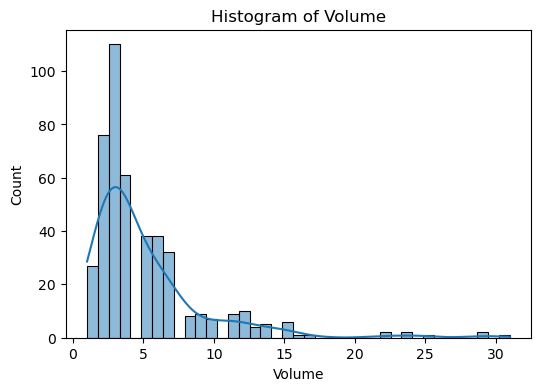

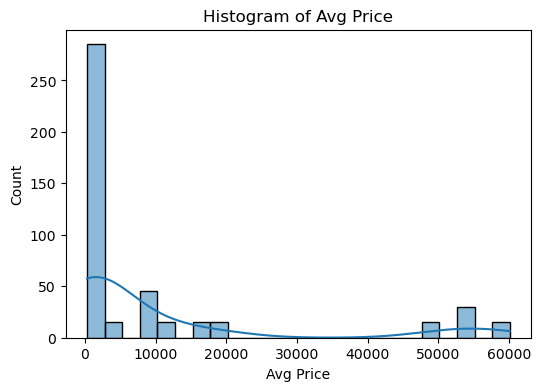

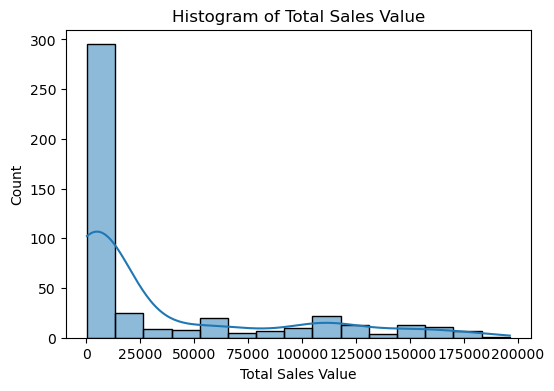

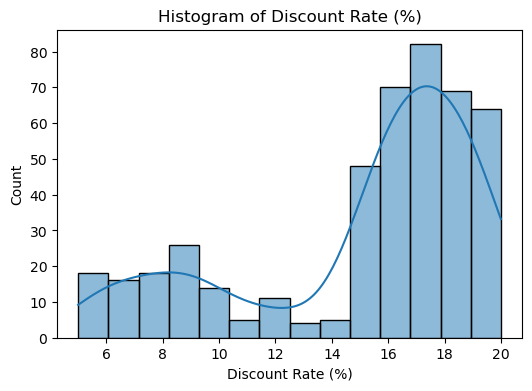

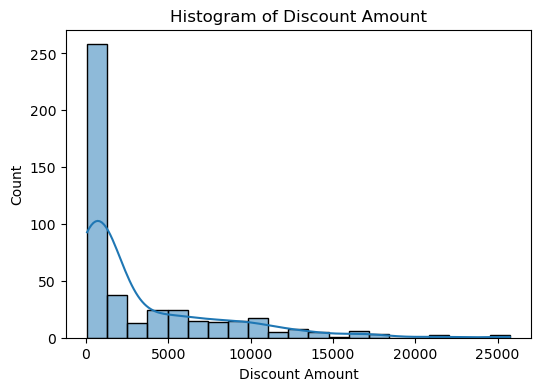

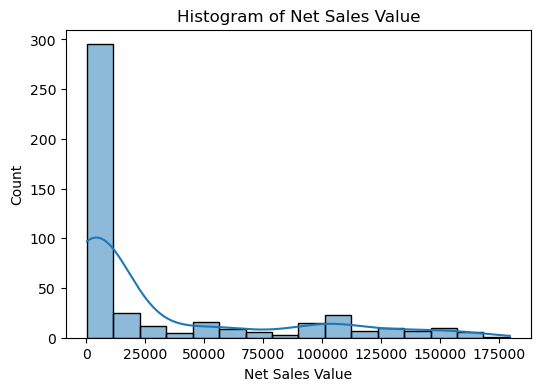

In [13]:
# Visualize the distributions
for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(data[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.show()


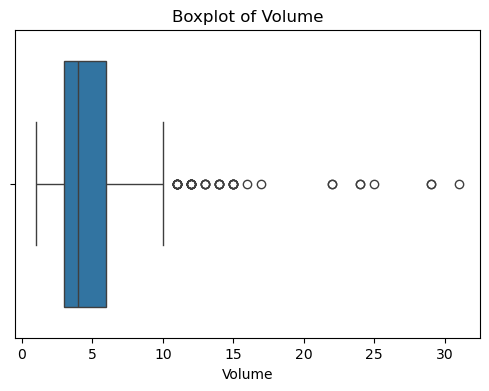

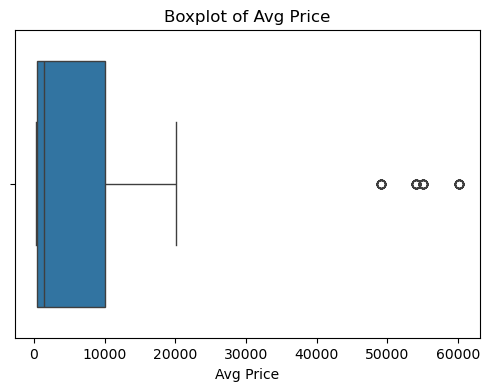

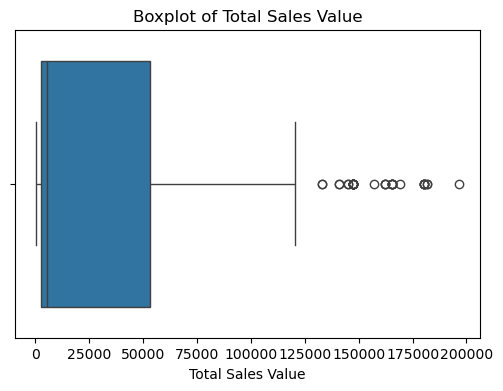

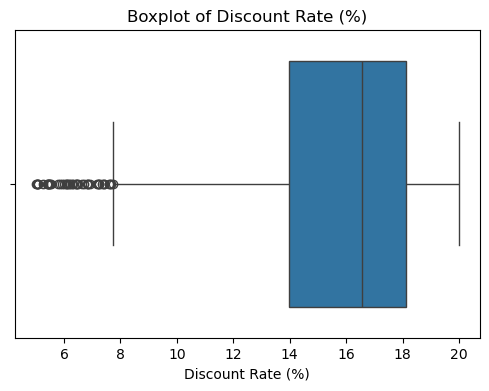

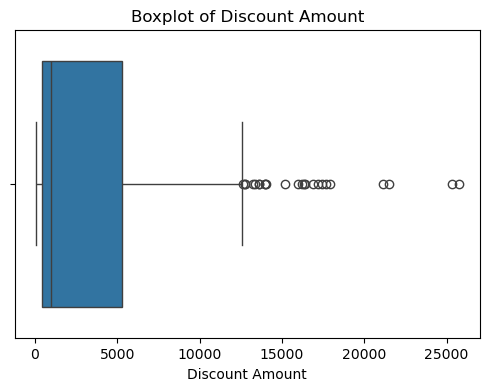

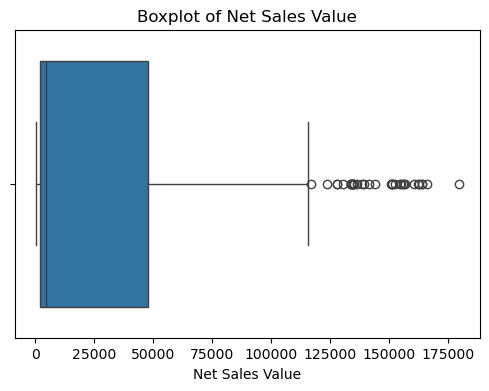

In [14]:
# Boxplot for outliers
for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

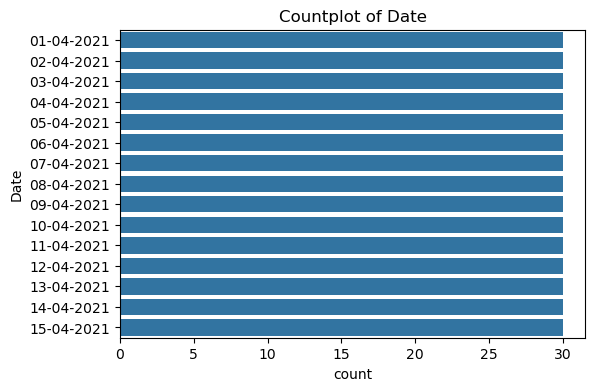

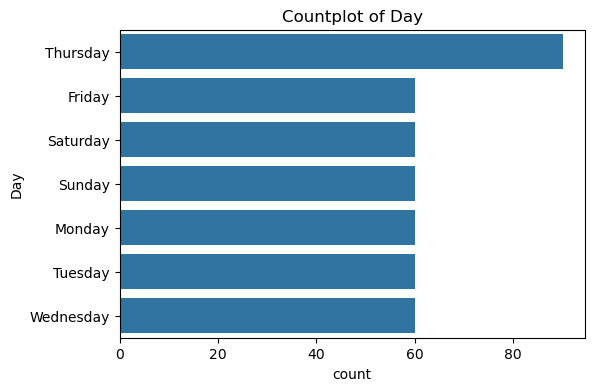

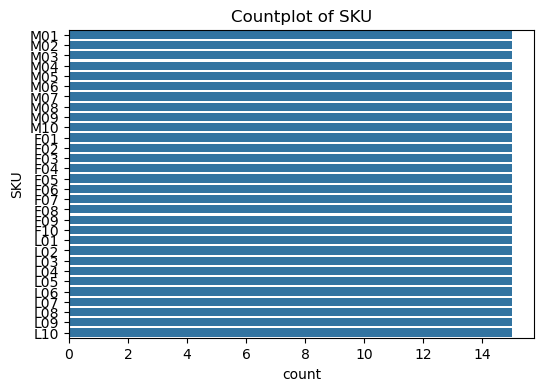

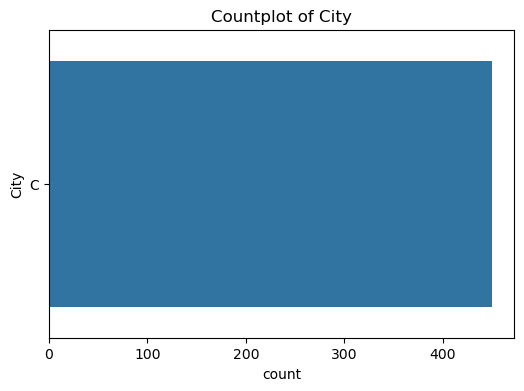

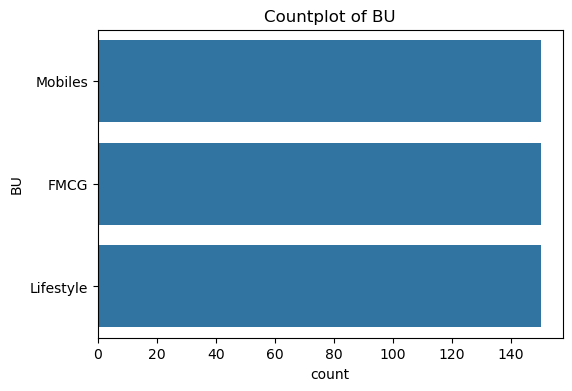

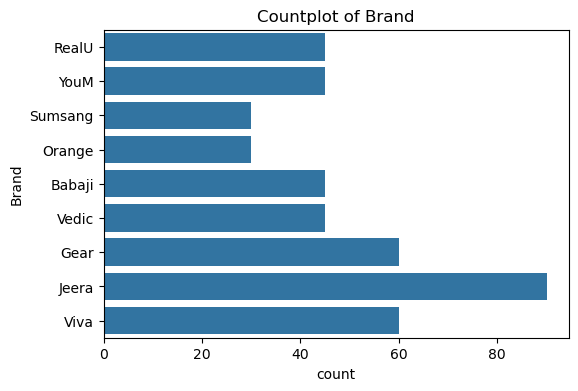

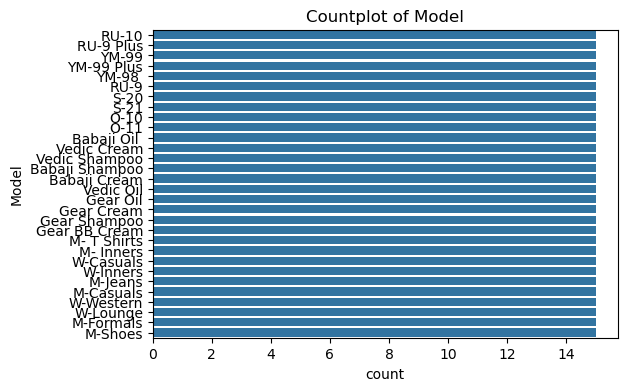

In [15]:
# Bar chart for categorical columns
for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(y=data[col])
    plt.title(f'Countplot of {col}')
    plt.show()

In [18]:
# 3. Data Standardization for numerical variables
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])
print(scaler)
data[numerical_cols]

StandardScaler()


,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,2.350029,0.091173,2.925721,-0.830289,3.952816,2.804756
1,1.167129,-0.019570,1.330995,-0.852661,1.849014,1.271026
2,0.457388,0.312659,1.562775,-1.351631,1.622995,1.545675
3,0.220808,0.534146,1.719276,-1.949723,1.113807,1.765810
4,-0.488932,-0.130313,-0.188452,0.673739,0.227852,-0.227595
...,...,...,...,...,...,...
445,-0.725512,-0.506840,-0.618334,0.076009,-0.653541,-0.610461
446,0.220808,-0.434857,-0.360801,0.451097,-0.152191,-0.378500
447,-0.725512,-0.490229,-0.606448,0.903793,-0.608140,-0.601921
448,-0.488932,-0.473617,-0.556923,0.388474,-0.530379,-0.555499


In [23]:
# 4. One-hot encoding for categorical variables
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_data = pd.DataFrame(encoder.fit_transform(data[categorical_cols]))

# Reset the index for the encoded data to match the original data index
encoded_data.index = data.index

# Display part of the processed dataset
print(encoded_data.head())


    0    1    2    3    4    5    6    7    8    9   ...   78   79   80   81  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   

    82   83   84   85   86   87  
0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  1.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  1.0  
4  0.0  0.0  0.0  1.0  0.0  0.0  

[5 rows x 88 columns]


In [26]:
# Combine the encoded data with the numerical columns
processed_data = pd.concat([data[numerical_cols], encoded_data], axis=1)

In [25]:
# Display part of the processed dataset
print(processed_data.head())

     Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0  2.350029   0.091173           2.925721          -0.830289         3.952816   
1  1.167129  -0.019570           1.330995          -0.852661         1.849014   
2  0.457388   0.312659           1.562775          -1.351631         1.622995   
3  0.220808   0.534146           1.719276          -1.949723         1.113807   
4 -0.488932  -0.130313          -0.188452           0.673739         0.227852   

   Net Sales Value    0    1    2    3  ...   78   79   80   81   82   83  \
0         2.804756  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0   
1         1.271026  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0   
2         1.545675  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0   
3         1.765810  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0   
4        -0.227595  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0   

    84   85   86   87  
0  0.0  0.0  0.0  0.0  
1 

In [29]:
print(data.columns)


Index(['Date', 'Day', 'SKU', 'City', 'Volume', 'BU', 'Brand', 'Model',
       'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')
